In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sys
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import *
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from catboost import CatBoostClassifier

In [16]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

In [17]:
dataset.shape

(150, 5)

In [18]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
dataset.head(10)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [28]:
# распределение по классам
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

<AxesSubplot:>

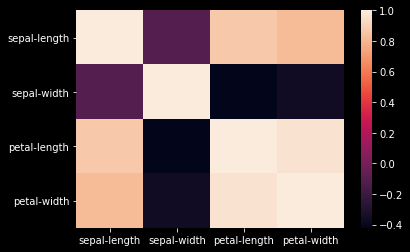

In [30]:
# зависимости переменных
import seaborn as sns
sns.heatmap(dataset.corr())

sepal-length       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal-width     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal-length          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal-width        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

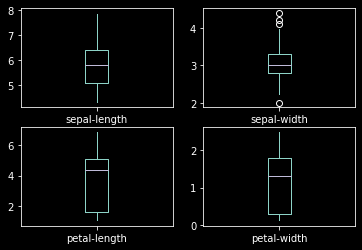

In [38]:
# участки каждой переменной отдельно
dataset.plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False)

array([[<AxesSubplot:title={'center':'sepal-length'}>,
        <AxesSubplot:title={'center':'sepal-width'}>],
       [<AxesSubplot:title={'center':'petal-length'}>,
        <AxesSubplot:title={'center':'petal-width'}>]], dtype=object)

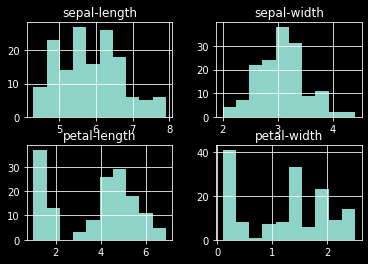

In [40]:
# гистограмма каждой переменной
dataset.hist()

array([[<AxesSubplot:xlabel='sepal-length', ylabel='sepal-length'>,
        <AxesSubplot:xlabel='sepal-width', ylabel='sepal-length'>,
        <AxesSubplot:xlabel='petal-length', ylabel='sepal-length'>,
        <AxesSubplot:xlabel='petal-width', ylabel='sepal-length'>],
       [<AxesSubplot:xlabel='sepal-length', ylabel='sepal-width'>,
        <AxesSubplot:xlabel='sepal-width', ylabel='sepal-width'>,
        <AxesSubplot:xlabel='petal-length', ylabel='sepal-width'>,
        <AxesSubplot:xlabel='petal-width', ylabel='sepal-width'>],
       [<AxesSubplot:xlabel='sepal-length', ylabel='petal-length'>,
        <AxesSubplot:xlabel='sepal-width', ylabel='petal-length'>,
        <AxesSubplot:xlabel='petal-length', ylabel='petal-length'>,
        <AxesSubplot:xlabel='petal-width', ylabel='petal-length'>],
       [<AxesSubplot:xlabel='sepal-length', ylabel='petal-width'>,
        <AxesSubplot:xlabel='sepal-width', ylabel='petal-width'>,
        <AxesSubplot:xlabel='petal-length', ylabel='petal-

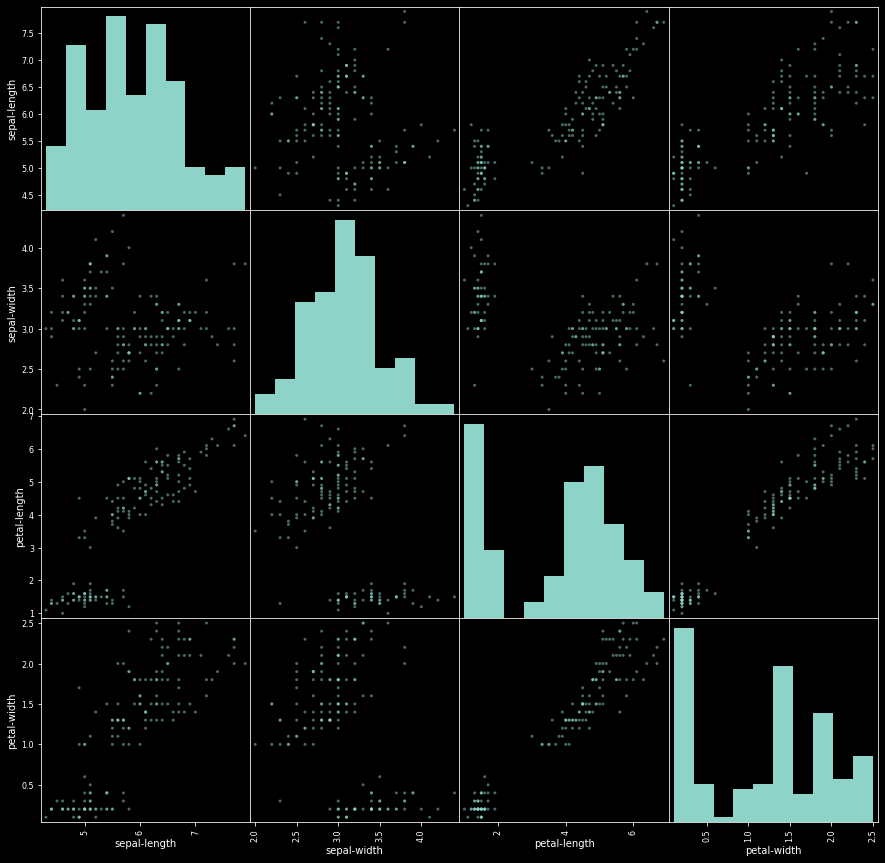

In [54]:
# взаимодействие между переменными
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, figsize=[15,15])

In [56]:
# создаем набор данных для проверки
array = dataset.values
X = array[:, 0:4]
y = array[:, 4]
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2)

In [73]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %.3f (%.3f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.950 (0.055)
LDA: 0.983 (0.033)
KNN: 0.958 (0.056)
CART: 0.950 (0.085)
NB: 0.967 (0.076)
SVM: 0.983 (0.033)


In [75]:
CB = CatBoostClassifier()
cb_results = cross_val_score(CB, X_train, y_train, cv=kfold, scoring='accuracy')
print('CB: %.3f (%.3f)' % (cb_results.mean(), cb_results.std()))

learn: 0.0060086	total: 2.06s	remaining: 1.29s
616:	learn: 0.0060009	total: 2.07s	remaining: 1.28s
617:	learn: 0.0059846	total: 2.07s	remaining: 1.28s
618:	learn: 0.0059739	total: 2.07s	remaining: 1.27s
619:	learn: 0.0059651	total: 2.07s	remaining: 1.27s
620:	learn: 0.0059534	total: 2.07s	remaining: 1.26s
621:	learn: 0.0059418	total: 2.08s	remaining: 1.26s
622:	learn: 0.0059292	total: 2.08s	remaining: 1.26s
623:	learn: 0.0059222	total: 2.08s	remaining: 1.25s
624:	learn: 0.0059136	total: 2.09s	remaining: 1.25s
625:	learn: 0.0059005	total: 2.09s	remaining: 1.25s
626:	learn: 0.0058857	total: 2.09s	remaining: 1.25s
627:	learn: 0.0058749	total: 2.1s	remaining: 1.24s
628:	learn: 0.0058666	total: 2.1s	remaining: 1.24s
629:	learn: 0.0058568	total: 2.1s	remaining: 1.23s
630:	learn: 0.0058471	total: 2.1s	remaining: 1.23s
631:	learn: 0.0058395	total: 2.1s	remaining: 1.22s
632:	learn: 0.0058279	total: 2.1s	remaining: 1.22s
633:	learn: 0.0058195	total: 2.11s	remaining: 1.22s
634:	learn: 0.0058027	t

In [88]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')


In [96]:
# Делаем прогнозы
model_SVC = SVC(gamma='auto')
model_SVC.fit(X_train, y_train)
predictions = model_SVC.predict(X_validation)

In [97]:
#  оцениваем прогнозы сравнивая их с ожидаемыми результатами
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.9666666666666667
[[ 9  0  0]
 [ 0  8  0]
 [ 0  1 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [102]:
CB.fit(X,y)

67617	total: 3.01s	remaining: 1.88s
615:	learn: 0.0067500	total: 3.01s	remaining: 1.88s
616:	learn: 0.0067415	total: 3.01s	remaining: 1.87s
617:	learn: 0.0067253	total: 3.02s	remaining: 1.86s
618:	learn: 0.0067167	total: 3.02s	remaining: 1.86s
619:	learn: 0.0066993	total: 3.02s	remaining: 1.85s
620:	learn: 0.0066896	total: 3.03s	remaining: 1.85s
621:	learn: 0.0066743	total: 3.04s	remaining: 1.84s
622:	learn: 0.0066578	total: 3.07s	remaining: 1.86s
623:	learn: 0.0066486	total: 3.07s	remaining: 1.85s
624:	learn: 0.0066394	total: 3.08s	remaining: 1.85s
625:	learn: 0.0066254	total: 3.08s	remaining: 1.84s
626:	learn: 0.0066149	total: 3.08s	remaining: 1.83s
627:	learn: 0.0066071	total: 3.08s	remaining: 1.83s
628:	learn: 0.0065951	total: 3.08s	remaining: 1.82s
629:	learn: 0.0065816	total: 3.09s	remaining: 1.81s
630:	learn: 0.0065717	total: 3.09s	remaining: 1.81s
631:	learn: 0.0065626	total: 3.09s	remaining: 1.8s
632:	learn: 0.0065472	total: 3.14s	remaining: 1.82s
633:	learn: 0.0065363	total: 

In [105]:
prediction_CB = CB.predict(X_validation)

In [106]:
print(accuracy_score(y_validation, prediction_CB))
print(confusion_matrix(y_validation, prediction_CB))
print(classification_report(y_validation, prediction_CB))

1.0
[[ 9  0  0]
 [ 0  8  0]
 [ 0  0 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

